# Airline Passenger Satisfaction

<img src="https://miro.medium.com/max/1400/1*on8xOgX50TFWUG6WCyvFFA.png" width="800" />

# Introduction (problem or your goal)

# Dataset Overview and Source

US Airline passenger satisfaction survey dataset.

# Data Collection

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn import metrics

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [2]:
# df.to_csv('Airline_Passenger_Satisfaction.csv')
# df1x =  pd.read_excel('satisfaction.xlsx')
# df2x = pd.read_excel('satisfaction_2015.xlsx')
# dfx = pd.concat([df1x, df2x], axis=0, ignore_index=True)
# dfx.to_csv('Airline_Passenger_Satisfaction_Original.csv')

# Data Preparation

In [3]:
df = pd.read_csv("Airline_Passenger_Satisfaction_Original.csv", index_col=0)
df.head()

,id,satisfaction_v2,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight service
0,11112,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,...,3,3,0,3,5,3,2,0,0.0,NaN
1,110278,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,...,3,4,4,4,2,3,2,310,305.0,NaN
2,103199,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,...,2,3,3,4,4,4,2,0,0.0,NaN
3,47462,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,...,1,1,0,1,4,1,3,0,0.0,NaN
4,120011,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,...,2,2,0,2,4,2,5,0,0.0,NaN


In [4]:
df.shape

(259760, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259760 entries, 0 to 259759
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 259760 non-null  int64  
 1   satisfaction_v2                    259760 non-null  object 
 2   Gender                             259760 non-null  object 
 3   Customer Type                      259760 non-null  object 
 4   Age                                259760 non-null  int64  
 5   Type of Travel                     259760 non-null  object 
 6   Class                              259760 non-null  object 
 7   Flight Distance                    259760 non-null  int64  
 8   Seat comfort                       259760 non-null  int64  
 9   Departure/Arrival time convenient  259760 non-null  int64  
 10  Food and drink                     259760 non-null  int64  
 11  Gate location                      2597

In [6]:
df.isnull().sum()

id                                        0
satisfaction_v2                           0
Gender                                    0
Customer Type                             0
Age                                       0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Seat comfort                              0
Departure/Arrival time convenient         0
Food and drink                            0
Gate location                             0
Inflight wifi service                     0
Inflight entertainment                    0
Online support                       129880
Ease of Online booking                    0
On-board service                          0
Leg room service                          0
Baggage handling                          0
Checkin service                           0
Cleanliness                               0
Online boarding                           0
Departure Delay in Minutes      

In [7]:
df = df.drop(columns=['Inflight service','Online support', 'Arrival Delay in Minutes', 'id','Gate location','Departure/Arrival time convenient'])
# df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(0)

In [8]:
df.isnull().sum().sum()

0

In [9]:
df.describe()

,Age,Flight Distance,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
count,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000,259760.000000
mean,39.427957,1585.862723,3.139979,3.028384,2.988913,3.370777,3.114490,3.424049,3.418390,3.663894,3.323537,3.496043,3.302610,14.713713
std,15.119331,1086.918816,1.389708,1.399158,1.349414,1.340125,1.400915,1.279649,1.306038,1.168743,1.263503,1.253055,1.325911,38.071053
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,606.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,40.000000,1510.000000,3.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,51.000000,2297.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,12.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000


In [10]:
df.describe(include=['O'])

,satisfaction_v2,Gender,Customer Type,Type of Travel,Class
count,259760,259760,259760,259760,259760
unique,2,2,2,2,3
top,neutral or dissatisfied,Female,Loyal Customer,Business travel,Business
freq,132245,131798,212200,179386,124320


In [11]:
sum(df.duplicated())

3

In [12]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

# Preprocessing and EDA

In [13]:
df = df.rename({'satisfaction_v2': 'Satisfaction'}, axis=1)

In [14]:
y = df['Satisfaction']
df = df.drop(columns='Satisfaction', axis=1)
df['Satisfaction'] = y

In [15]:

# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,Female,Loyal Customer,Personal Travel,Eco,satisfied
1,Male,Loyal Customer,Personal Travel,Business,satisfied
2,Female,Loyal Customer,Personal Travel,Eco,satisfied
3,Female,Loyal Customer,Personal Travel,Eco,satisfied
4,Female,Loyal Customer,Personal Travel,Eco,satisfied


In [16]:
# apply Label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head()

,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,0,0,1,1,1
1,1,0,1,0,1
2,0,0,1,1,1
3,0,0,1,1,1
4,0,0,1,1,1


In [17]:
# concat df_categorical with original df
df = df.drop(df_categorical.columns, axis=1)
df = pd.concat([df, df_categorical], axis=1)
df.head()

,Age,Flight Distance,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class,Satisfaction
0,65,265,0,0,2,4,3,3,0,3,5,3,2,0,0,0,1,1,1
1,47,2464,0,0,0,2,3,4,4,4,2,3,2,310,1,0,1,0,1
2,15,2138,0,0,2,0,2,3,3,4,4,4,2,0,0,0,1,1,1
3,60,623,0,0,3,4,1,1,0,1,4,1,3,0,0,0,1,1,1
4,70,354,0,0,4,3,2,2,0,2,4,2,5,0,0,0,1,1,1


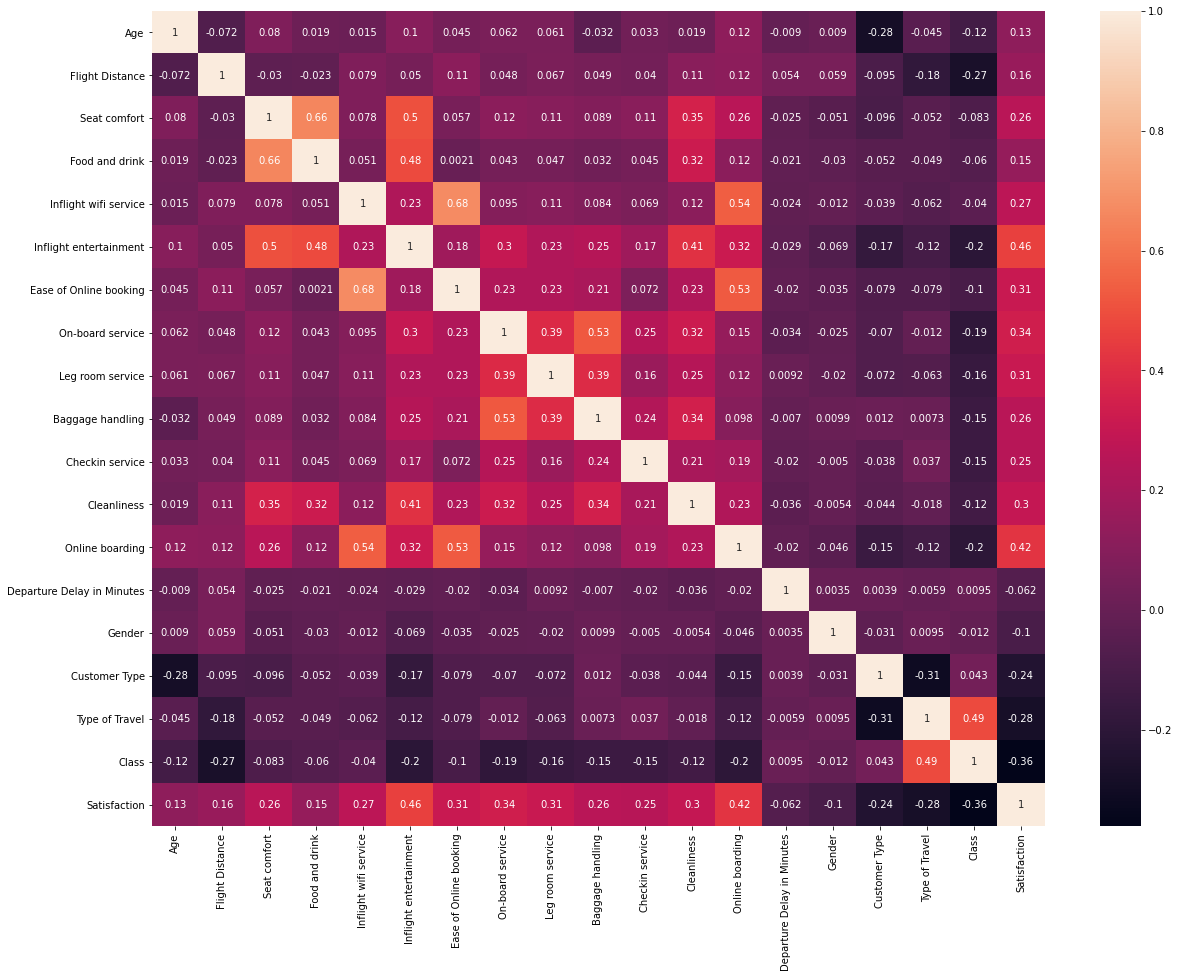

In [18]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr(), annot=True);

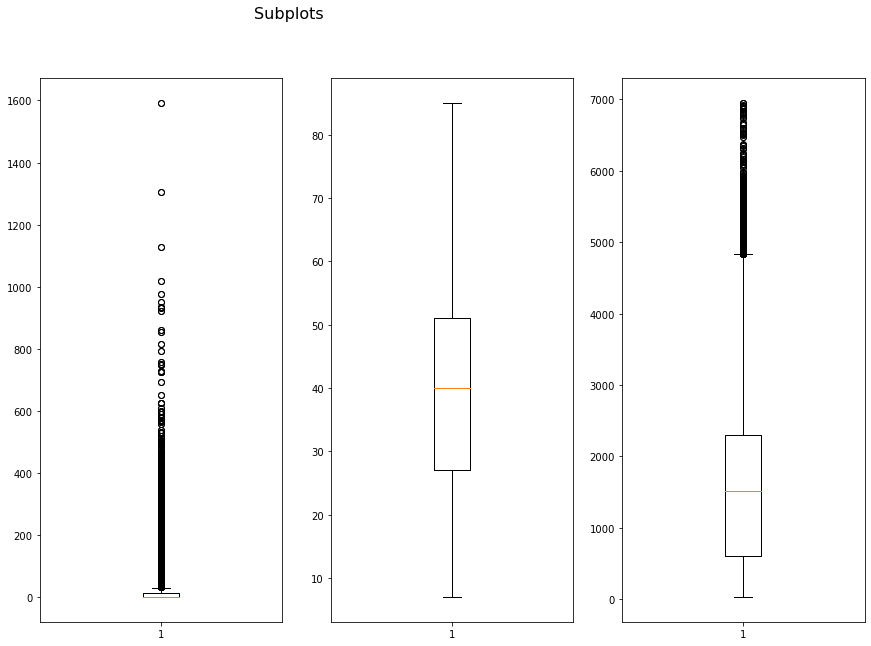

In [20]:
plt.figure(figsize=[20,10])
plt.suptitle('Subplots',fontsize = 16)

plt.subplot(1,4,2)
plt.boxplot(df['Departure Delay in Minutes']);

plt.subplot(1,4,3)
plt.boxplot(df['Age']);

plt.subplot(1,4,4)
plt.boxplot(df['Flight Distance']);

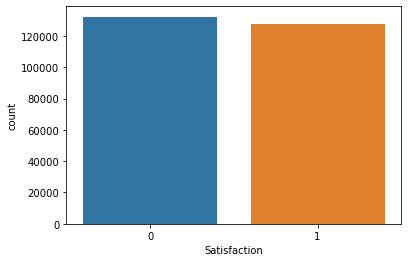

In [21]:
sns.countplot(data=df, x="Satisfaction");


# Machine Learning

In [19]:
X = df.iloc[:,:-1]
y = df['Satisfaction']

In [20]:
X.head(1)

,Age,Flight Distance,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class
0,65,265,0,0,2,4,3,3,0,3,5,3,2,0,0,0,1,1


In [21]:
y.head(1)

0    1
Name: Satisfaction, dtype: int32

# Grid Search

## Train-Test Split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [23]:
model_params = {    
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [5,10,20],
        }  
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'min_samples_split': [10,20,30],
            'criterion': ["gini", "entropy"]
        }  
    },
    'Naive Bayes':{ 
        'model': GaussianNB(),
        'params' : {
            'var_smoothing': np.logspace(0,-9, num=100)
        }  
        
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,100, 150]
        }
    },
    'Logistic Regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,10,100],
            'solver': ['newton-cg', 'liblinear']
        }
    }
}

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    scores.append({
        'Model': model_name,
        'Best_score': clf.best_score_,
        'Best_params': clf.best_params_,
        'Acuracy': accuracy_score(y_test,predictions),
        'Confusion_matrix': confusion_matrix(y_test,predictions)
    })
    
df_train_test_split = pd.DataFrame(scores,columns=['Model','Best_score','Best_params', 'Acuracy','Confusion_matrix'])
df_train_test_split

,Model,Best_score,Best_params,Acuracy,Confusion_matrix
0,K-Nearest Neighbors,0.729378,{'n_neighbors': 5},0.734550,"[[30143, 9567], [11119, 27099]]"
1,Decision Tree,0.929813,"{'criterion': 'entropy', 'min_samples_split': 30}",0.932887,"[[37524, 2186], [3044, 35174]]"
2,Naive Bayes,0.816569,{'var_smoothing': 1e-09},0.814778,"[[32878, 6832], [7602, 30616]]"
3,Random Forest,0.948727,{'n_estimators': 150},0.950583,"[[38276, 1434], [2417, 35801]]"
4,Logistic Regression,0.829582,"{'C': 10, 'solver': 'newton-cg'}",0.826853,"[[33538, 6172], [7321, 30897]]"


In [24]:
classifier = LogisticRegression(C=10, solver='newton-cg')
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.8208    0.8446    0.8325     39710
           1     0.8335    0.8084    0.8208     38218

    accuracy                         0.8269     77928
   macro avg     0.8272    0.8265    0.8267     77928
weighted avg     0.8270    0.8269    0.8268     77928



## Cross Validation

In [25]:
CV_scores = []

## K-Nearest Neighbors

In [26]:
classifier = KNeighborsClassifier(n_neighbors=5)
predictions = cross_val_predict(classifier, X, y, cv = 5)
CV_scores.append({
        'Model': 'K-Nearest Neighbors',
        'Acuracy': accuracy_score(y,predictions),
        'Confusion_matrix': confusion_matrix(y,predictions)
    })
print(classification_report(y, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.6907    0.7215    0.7057    132245
           1     0.6971    0.6649    0.6806    127512

    accuracy                         0.6937    259757
   macro avg     0.6939    0.6932    0.6932    259757
weighted avg     0.6938    0.6937    0.6934    259757



## Decision Tree

In [27]:
classifier = DecisionTreeClassifier(criterion= 'entropy', min_samples_split= 30)
predictions = cross_val_predict(classifier, X, y, cv = 5)
CV_scores.append({
        'Model': 'Decision Tree',
        'Acuracy': accuracy_score(y,predictions),
        'Confusion_matrix': confusion_matrix(y,predictions)
    })
print(classification_report(y, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.7328    0.7001    0.7161    132245
           1     0.7027    0.7353    0.7187    127512

    accuracy                         0.7174    259757
   macro avg     0.7178    0.7177    0.7174    259757
weighted avg     0.7181    0.7174    0.7173    259757



## Naive Bayes

In [28]:
classifier = GaussianNB(var_smoothing = 1e-09)
predictions = cross_val_predict(classifier, X, y, cv = 5)
CV_scores.append({
        'Model': 'Naive Bayes',
        'Acuracy': accuracy_score(y,predictions),
        'Confusion_matrix': confusion_matrix(y,predictions)
    })
print(classification_report(y, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.7310    0.8244    0.7749    132245
           1     0.7901    0.6854    0.7340    127512

    accuracy                         0.7562    259757
   macro avg     0.7606    0.7549    0.7545    259757
weighted avg     0.7600    0.7562    0.7549    259757



## Random Forest

In [29]:
classifier = RandomForestClassifier(n_estimators =150)
predictions = cross_val_predict(classifier, X, y, cv = 5)
CV_scores.append({
        'Model': 'Random Forest',
        'Acuracy': accuracy_score(y,predictions),
        'Confusion_matrix': confusion_matrix(y,predictions)
    })
print(classification_report(y, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.7471    0.7217    0.7342    132245
           1     0.7212    0.7467    0.7337    127512

    accuracy                         0.7340    259757
   macro avg     0.7342    0.7342    0.7340    259757
weighted avg     0.7344    0.7340    0.7340    259757



## Logistic Regression

In [30]:
classifier = LogisticRegression(C=10, solver='newton-cg')
predictions = cross_val_predict(classifier, X, y, cv = 5)
CV_scores.append({
        'Model': 'Logistic Regression',
        'Acuracy': accuracy_score(y,predictions),
        'Confusion_matrix': confusion_matrix(y,predictions)
    })
print(classification_report(y, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.7495    0.7881    0.7683    132245
           1     0.7678    0.7269    0.7468    127512

    accuracy                         0.7580    259757
   macro avg     0.7587    0.7575    0.7576    259757
weighted avg     0.7585    0.7580    0.7578    259757



# Comparing Accuracy Scores

In [31]:
df_CV = pd.DataFrame(CV_scores,columns=['Model','Acuracy','Confusion_matrix'])
df_CV

,Model,Acuracy,Confusion_matrix
0,K-Nearest Neighbors,0.693702,"[[95413, 36832], [42731, 84781]]"
1,Decision Tree,0.717370,"[[92580, 39665], [33750, 93762]]"
2,Naive Bayes,0.756188,"[[109027, 23218], [40114, 87398]]"
3,Random Forest,0.733971,"[[95442, 36803], [32300, 95212]]"
4,Logistic Regression,0.758043,"[[104218, 28027], [34823, 92689]]"


In [32]:
df_TTS = df_train_test_split.iloc[:,[0,3,4]]
df_TTS

,Model,Acuracy,Confusion_matrix
0,K-Nearest Neighbors,0.734550,"[[30143, 9567], [11119, 27099]]"
1,Decision Tree,0.932887,"[[37524, 2186], [3044, 35174]]"
2,Naive Bayes,0.814778,"[[32878, 6832], [7602, 30616]]"
3,Random Forest,0.950583,"[[38276, 1434], [2417, 35801]]"
4,Logistic Regression,0.826853,"[[33538, 6172], [7321, 30897]]"


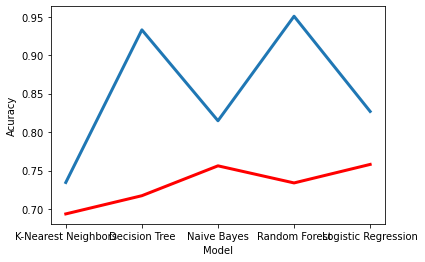

In [33]:
sns.lineplot(data=df_CV, x='Model', y='Acuracy', color="red", linewidth = 3)
sns.lineplot(data=df_TTS, x='Model', y='Acuracy', linewidth = 3);

In [34]:
data = {'Model': df_CV['Model'],
        'train_test_split': df_TTS['Acuracy'],
        'cross_val': df_CV['Acuracy']
       }
Line_Chart = pd.DataFrame(data).set_index('Model').T
Line_Chart

Model,K-Nearest Neighbors,Decision Tree,Naive Bayes,Random Forest,Logistic Regression
train_test_split,0.734550,0.932887,0.814778,0.950583,0.826853
cross_val,0.693702,0.717370,0.756188,0.733971,0.758043


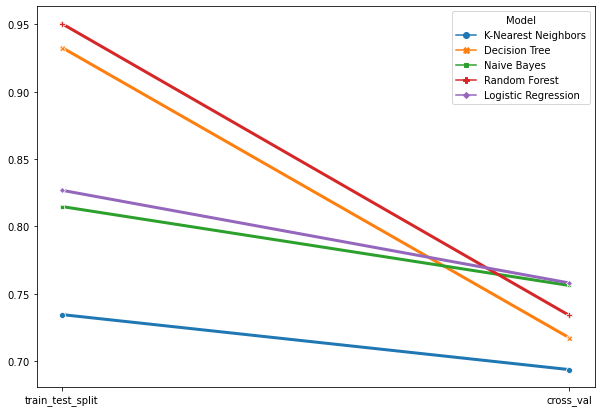

In [35]:
plt.figure(figsize = (10,7))
sns.lineplot(data=Line_Chart, markers=True, dashes=False, linewidth = 3);

In [36]:
# LogisticRegression without Normalization
classifier = LogisticRegression(C=10, solver='newton-cg')
classifier.fit(X_train,y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.8208    0.8446    0.8325     39710
           1     0.8335    0.8084    0.8208     38218

    accuracy                         0.8269     77928
   macro avg     0.8272    0.8265    0.8267     77928
weighted avg     0.8270    0.8269    0.8268     77928



# With Normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)
X_test1 = scaler.transform(X_test)

classifier = LogisticRegression(C=10, solver='newton-cg')
classifier.fit(X_train1,y_train)
predictions = classifier.predict(X_test1)
print(classification_report(y_test, predictions, digits=4))


              precision    recall  f1-score   support

           0     0.8207    0.8445    0.8325     39710
           1     0.8335    0.8083    0.8207     38218

    accuracy                         0.8268     77928
   macro avg     0.8271    0.8264    0.8266     77928
weighted avg     0.8270    0.8268    0.8267     77928



In [38]:
X.head()

,Age,Flight Distance,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class
0,65,265,0,0,2,4,3,3,0,3,5,3,2,0,0,0,1,1
1,47,2464,0,0,0,2,3,4,4,4,2,3,2,310,1,0,1,0
2,15,2138,0,0,2,0,2,3,3,4,4,4,2,0,0,0,1,1
3,60,623,0,0,3,4,1,1,0,1,4,1,3,0,0,0,1,1
4,70,354,0,0,4,3,2,2,0,2,4,2,5,0,0,0,1,1


In [39]:
from sklearn.preprocessing import MinMaxScaler

X_copy = X.copy()
scaler = MinMaxScaler()
X_columns = X.columns
X_scaled = pd.DataFrame(scaler.fit_transform(X_copy), columns=X_columns)
X_scaled.head()

,Age,Flight Distance,Seat comfort,Food and drink,Inflight wifi service,Inflight entertainment,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Gender,Customer Type,Type of Travel,Class
0,0.743590,0.033815,0.0,0.0,0.4,0.8,0.6,0.6,0.0,0.50,1.0,0.6,0.4,0.000000,0.0,0.0,1.0,0.5
1,0.512821,0.351590,0.0,0.0,0.0,0.4,0.6,0.8,0.8,0.75,0.4,0.6,0.4,0.194724,1.0,0.0,1.0,0.0
2,0.102564,0.304480,0.0,0.0,0.4,0.0,0.4,0.6,0.6,0.75,0.8,0.8,0.4,0.000000,0.0,0.0,1.0,0.5
3,0.679487,0.085549,0.0,0.0,0.6,0.8,0.2,0.2,0.0,0.00,0.8,0.2,0.6,0.000000,0.0,0.0,1.0,0.5
4,0.807692,0.046676,0.0,0.0,0.8,0.6,0.4,0.4,0.0,0.25,0.8,0.4,1.0,0.000000,0.0,0.0,1.0,0.5


## Train/test split with normalized data

In [40]:
Xscaled_train, Xscaled_test, yscaled_train, yscaled_test = train_test_split(X_scaled, y, test_size=0.3, random_state=100)


In [41]:
classifier = LogisticRegression(C=10, solver='newton-cg')
classifier.fit(Xscaled_train,yscaled_train)
predictions = classifier.predict(Xscaled_test)
print(classification_report(yscaled_test, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.8208    0.8445    0.8325     39710
           1     0.8335    0.8084    0.8207     38218

    accuracy                         0.8268     77928
   macro avg     0.8271    0.8265    0.8266     77928
weighted avg     0.8270    0.8268    0.8267     77928



In [42]:
model_params = {    
    'K-Nearest Neighbors': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors': [5,10,20],
        }  
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params' : {
            'min_samples_split': [10,20,30],
            'criterion': ["gini", "entropy"]
        }  
    },
    'Naive Bayes':{ 
        'model': GaussianNB(),
        'params' : {
            'var_smoothing': np.logspace(0,-9, num=100)
        }  
        
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [10,100, 150]
        }
    },
    'Logistic Regression' : {
        'model': LogisticRegression(),
        'params': {
            'C': [1,10,100],
            'solver': ['newton-cg', 'liblinear']
        }
    }
}

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(Xscaled_train, yscaled_train)
    predictions = clf.predict(Xscaled_test)
    scores.append({
        'Model': model_name,
        'Best_score': clf.best_score_,
        'Best_params': clf.best_params_,
        'Acuracy': accuracy_score(yscaled_test,predictions),
        'Confusion_matrix': confusion_matrix(yscaled_test,predictions)
    })
    
df_train_test_splitN = pd.DataFrame(scores,columns=['Model','Best_score','Best_params', 'Acuracy','Confusion_matrix'])
df_train_test_splitN

,Model,Best_score,Best_params,Acuracy,Confusion_matrix
0,K-Nearest Neighbors,0.916850,{'n_neighbors': 5},0.917924,"[[37616, 2094], [4302, 33916]]"
1,Decision Tree,0.929868,"{'criterion': 'entropy', 'min_samples_split': 30}",0.932784,"[[37523, 2187], [3051, 35167]]"
2,Naive Bayes,0.819358,{'var_smoothing': 0.04328761281083057},0.817370,"[[32983, 6727], [7505, 30713]]"
3,Random Forest,0.948336,{'n_estimators': 150},0.951006,"[[38301, 1409], [2409, 35809]]"
4,Logistic Regression,0.829571,"{'C': 100, 'solver': 'newton-cg'}",0.826853,"[[33538, 6172], [7321, 30897]]"


In [58]:
df_train_test_splitN = pd.DataFrame(scores,columns=['Model','Best_score','Best_params', 'Acuracy','Confusion_matrix'])
df_train_test_splitN

,Model,Best_score,Best_params,Acuracy,Confusion_matrix
0,K-Nearest Neighbors,0.916850,{'n_neighbors': 5},0.917924,"[[37616, 2094], [4302, 33916]]"
1,Decision Tree,0.929868,"{'criterion': 'entropy', 'min_samples_split': 30}",0.932784,"[[37523, 2187], [3051, 35167]]"
2,Naive Bayes,0.819358,{'var_smoothing': 0.04328761281083057},0.817370,"[[32983, 6727], [7505, 30713]]"
3,Random Forest,0.948336,{'n_estimators': 150},0.951006,"[[38301, 1409], [2409, 35809]]"
4,Logistic Regression,0.829571,"{'C': 100, 'solver': 'newton-cg'}",0.826853,"[[33538, 6172], [7321, 30897]]"


## Cross-validation with normalized data

In [88]:
CV_scoresN=[]

## KNN

In [89]:
# Scaled data with Cross-validation

classifier = KNeighborsClassifier(n_neighbors=5)
predictions = cross_val_predict(classifier, X_scaled, y, cv = 5)
CV_scoresN.append({
        'Model': 'K-Nearest Neighbors',
        'Acuracy': accuracy_score(y,predictions),
        'Confusion_matrix': confusion_matrix(y,predictions)
    })
print(classification_report(y, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.7059    0.7523    0.7284    132245
           1     0.7244    0.6750    0.6988    127512

    accuracy                         0.7144    259757
   macro avg     0.7151    0.7137    0.7136    259757
weighted avg     0.7150    0.7144    0.7139    259757



## Decision Tree

In [90]:
classifier = DecisionTreeClassifier(criterion= 'entropy', min_samples_split= 30)
predictions = cross_val_predict(classifier, X, y, cv = 5)
CV_scoresN.append({
        'Model': 'Decision Tree',
        'Acuracy': accuracy_score(y,predictions),
        'Confusion_matrix': confusion_matrix(y,predictions)
    })
print(classification_report(y, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.7316    0.6968    0.7137    132245
           1     0.7003    0.7349    0.7172    127512

    accuracy                         0.7155    259757
   macro avg     0.7159    0.7158    0.7155    259757
weighted avg     0.7162    0.7155    0.7154    259757



## Naive Bayes

In [91]:
classifier = GaussianNB(var_smoothing = 1e-09)
predictions = cross_val_predict(classifier, X, y, cv = 5)
CV_scoresN.append({
        'Model': 'Naive Bayes',
        'Acuracy': accuracy_score(y,predictions),
        'Confusion_matrix': confusion_matrix(y,predictions)
    })
print(classification_report(y, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.7310    0.8244    0.7749    132245
           1     0.7901    0.6854    0.7340    127512

    accuracy                         0.7562    259757
   macro avg     0.7606    0.7549    0.7545    259757
weighted avg     0.7600    0.7562    0.7549    259757



## Random Forest

In [92]:
classifier = RandomForestClassifier(n_estimators =150)
predictions = cross_val_predict(classifier, X_scaled, y, cv = 5)
CV_scoresN.append({
        'Model': 'Random Forest',
        'Acuracy': accuracy_score(y,predictions),
        'Confusion_matrix': confusion_matrix(y,predictions)
    })
print(classification_report(y, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.7488    0.7278    0.7382    132245
           1     0.7257    0.7467    0.7361    127512

    accuracy                         0.7371    259757
   macro avg     0.7372    0.7373    0.7371    259757
weighted avg     0.7374    0.7371    0.7371    259757



## Logistic Regression

In [93]:
classifier = LogisticRegression(C=10, solver='newton-cg')
predictions = cross_val_predict(classifier, X_scaled, y, cv = 5)
CV_scoresN.append({
        'Model': 'Logistic Regression',
        'Acuracy': accuracy_score(y,predictions),
        'Confusion_matrix': confusion_matrix(y,predictions)
    })
print(classification_report(y, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.7495    0.7880    0.7683    132245
           1     0.7678    0.7269    0.7468    127512

    accuracy                         0.7580    259757
   macro avg     0.7587    0.7575    0.7575    259757
weighted avg     0.7585    0.7580    0.7577    259757



In [94]:
df_CVN = pd.DataFrame(CV_scoresN,columns=['Model','Acuracy','Confusion_matrix'])
df_CVN

,Model,Acuracy,Confusion_matrix
0,K-Nearest Neighbors,0.714360,"[[99493, 32752], [41445, 86067]]"
1,Decision Tree,0.715461,"[[92143, 40102], [33809, 93703]]"
2,Naive Bayes,0.756188,"[[109027, 23218], [40114, 87398]]"
3,Random Forest,0.737120,"[[96253, 35992], [32293, 95219]]"
4,Logistic Regression,0.758024,"[[104213, 28032], [34823, 92689]]"


In [95]:
a = {'Model': df_CVN['Model'],
        'train_test_split': df_train_test_splitN['Acuracy'],
        'cross_val': df_CVN['Acuracy']
       }
Line_ChartN = pd.DataFrame(a).set_index('Model').T
Line_ChartN

Model,K-Nearest Neighbors,Decision Tree,Naive Bayes,Random Forest,Logistic Regression
train_test_split,0.917924,0.932784,0.817370,0.951006,0.826853
cross_val,0.714360,0.715461,0.756188,0.737120,0.758024


<Figure size 1800x720 with 0 Axes>

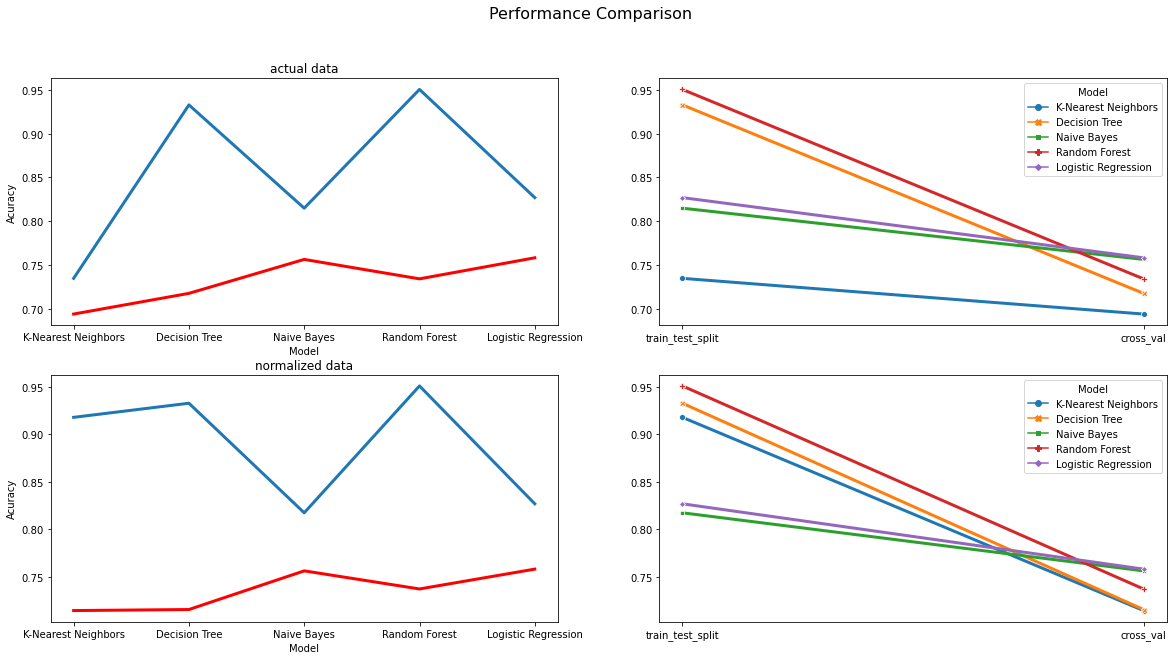

<Figure size 1800x720 with 0 Axes>

In [102]:

plt.figure(figsize=[20,10])
plt.suptitle('Performance Comparison',fontsize = 16)

plt.subplot(2,2,1)
plt.title('actual data')
sns.lineplot(data=df_CV, x='Model', y='Acuracy', color="red", linewidth = 3)
sns.lineplot(data=df_TTS, x='Model', y='Acuracy', linewidth = 3);

plt.subplot(2,2,2)
sns.lineplot(data=Line_Chart, markers=True, dashes=False, linewidth = 3);

plt.subplot(2,2,3)
plt.title('normalized data')
sns.lineplot(data=df_CVN, x='Model', y='Acuracy', color="red", linewidth = 3)
sns.lineplot(data=df_train_test_splitN, x='Model', y='Acuracy', linewidth = 3);

plt.subplot(2,2,4)
sns.lineplot(data=Line_ChartN, markers=True, dashes=False, linewidth = 3);
plt.figure(figsize=[25,10])


In [97]:
data2 = {'Model': df_CV['Model'],
        'train_test_split': df_TTS['Acuracy'],
        'cross_val': df_CV['Acuracy'],
        'train_test_split_Normalized':df_train_test_splitN['Acuracy'],
        'cross_val_Normalized': df_CVN['Acuracy']
       }
comparisionTable = pd.DataFrame(data2).set_index('Model').T
comparisionTable

Model,K-Nearest Neighbors,Decision Tree,Naive Bayes,Random Forest,Logistic Regression
train_test_split,0.734550,0.932887,0.814778,0.950583,0.826853
cross_val,0.693702,0.717370,0.756188,0.733971,0.758043
train_test_split_Normalized,0.917924,0.932784,0.817370,0.951006,0.826853
cross_val_Normalized,0.714360,0.715461,0.756188,0.737120,0.758024


### at the end normalization didn't change the result except for KNeighborsClassifier it improved it 

### Random Forest classifier generates the highest accuracy score with the train_test_split_Normalized data.

In [103]:
rfc = RandomForestClassifier(n_estimators =150)
rfc.fit(Xscaled_train, yscaled_train)
rfc_pred=rfc.predict(Xscaled_test)################
print(classification_report(yscaled_test, rfc_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9409    0.9652    0.9529     39710
           1     0.9628    0.9370    0.9498     38218

    accuracy                         0.9514     77928
   macro avg     0.9519    0.9511    0.9513     77928
weighted avg     0.9517    0.9514    0.9514     77928



In [ ]:
# rfc.predict(Xscaled_test)